<a href="https://colab.research.google.com/github/vipulgote1999/machine-learning-udacity/blob/master/outlinear_removal_in_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install scikit-learn==0.18

In [0]:
!git clone https://github.com/udacity/ud120-projects.git

fatal: destination path 'ud120-projects' already exists and is not an empty directory.


In [0]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).
 
        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    print "outlierCleaner activated"
    cleaned_data = []
  
    tuples = []
    length = len(ages)
    print("length",length)
    for i in range(length):
        tuples.append((ages[i][0], net_worths[i][0], net_worths[i][0] - predictions[i][0]))
 
    print "Tuples: ", tuples
 
    differences_tuples = []
    for i in range(length):
        differences_tuples.append((abs(net_worths[i][0] - predictions[i][0]), i))
    print "Differences: ", differences_tuples
    differences_sorted = sorted(differences_tuples)
    
    # Return the indices of the datapoints to be removed
    
    indices_to_remove = []
    for i in range(int(length/10)):
        indices_to_remove.append(differences_sorted[length - 1 - i][1])
    indices_to_remove = sorted(indices_to_remove, reverse=True)
    print "Indices to remove: ", indices_to_remove
 
    # Remove the relevant tuples
    for i in indices_to_remove:
        del tuples[i]
    
    cleaned_data = tuples
    print "Cleaned_data: ", cleaned_data  
    print "Number of items in cleaned data: ", len(cleaned_data)             
    return cleaned_data

# **code begin from here**

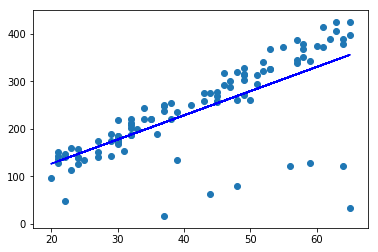

outlierCleaner activated
('length', 90)
Tuples:  [(57, 338.08951848957577, 23.437450267845293), (57, 344.21586775541203, 29.56379953368156), (34, 243.79287311628013, 45.933209693675565), (64, 378.84578142088196, 28.64819869506971), (25, 133.88384977349668, -18.274437858145603), (53, 326.56693250553326, 32.2265868575638), (62, 389.24094136476344, 49.1992199258317), (41, 250.26985299068266, 16.864675063996287), (21, 136.08924543132068, 4.242680373439441), (53, 368.29556369017877, 73.95521804220931), (48, 318.62560238232396, 49.674909951555776), (24, 139.40479592465923, -7.675561063542773), (24, 126.98012845155395, -20.100228536648046), (30, 185.1870343522352, 7.639093503391649), (32, 187.0976049078975, -0.6061972278265557), (45, 270.00424941518054, 16.287348914733144), (52, 339.7693315999082, 50.50691659537898), (65, 34.19027438129125, -321.08523898796125), (21, 142.1012008717193, 10.254635813838064), (60, 374.28347921780096, 44.39761906574972), (43, 259.43540492859483, 15.87436571502794

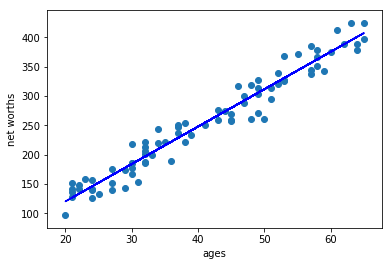

[[6.36859481]]
0.983189455395532


In [0]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle
import sklearn
### load up some practice data with outliers in it
ages = pickle.load( open("/content/ud120-projects/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("/content/ud120-projects/outliers/practice_outliers_net_worths.pkl", "r") )
'''print(ages)
print(net_worths)
'''

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
#print(ages)
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
    print(reg.coef_)


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"
print(reg.score(ages_test,net_worths_test ))
#print(reg.coef_)

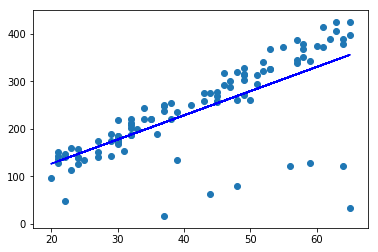

0.8782624703664671

In [0]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle
import sklearn
### load up some practice data with outliers in it
ages = pickle.load( open("/content/ud120-projects/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("/content/ud120-projects/outliers/practice_outliers_net_worths.pkl", "r") )
'''print(ages)
print(net_worths)
'''

### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
#print(ages)
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(ages_train,net_worths_train)
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()
reg.score(ages_test,net_worths_test )
